In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
aero = pd.read_csv('Авиарейсы.csv')

In [3]:
aero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   flight_id          127 non-null    int64  
 1   income             118 non-null    float64
 2   airtime            127 non-null    float64
 3   departure_airport  127 non-null    object 
 4   arrival_airport    127 non-null    object 
 5   passengers         127 non-null    int64  
 6   model              127 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 7.1+ KB


In [4]:
aero

,flight_id,income,airtime,departure_airport,arrival_airport,passengers,model
0,136119,1653000.0,1.666667,AAQ,SVO,113,Boeing 737-300
1,136120,1605400.0,1.666667,AAQ,SVO,109,Boeing 737-300
2,136122,1431000.0,1.666667,AAQ,SVO,97,Boeing 737-300
3,136130,1556600.0,1.666667,AAQ,SVO,107,Boeing 737-300
4,136131,1812800.0,1.666667,AAQ,SVO,124,Boeing 737-300
...,...,...,...,...,...,...,...
122,136936,632400.0,0.833333,AAQ,EGO,82,Sukhoi Superjet-100
123,136937,626100.0,0.833333,AAQ,EGO,81,Sukhoi Superjet-100
124,136951,720600.0,0.833333,AAQ,EGO,90,Sukhoi Superjet-100
125,136953,765300.0,0.833333,AAQ,EGO,97,Sukhoi Superjet-100


In [5]:
aero['income'].fillna(0, inplace = True)

In [6]:
aero['cost'] = aero['income']

In [7]:
aero['cost'] = aero['model'].apply(
    lambda x: aero['airtime']*47101*2.400 if x == 'Boeing 737-300' else aero['airtime']*47101*1.700)

In [8]:
aero['overall'] = aero['income'] - aero['cost']

In [9]:
aero

,flight_id,income,airtime,departure_airport,arrival_airport,passengers,model,cost,overall
0,136119,1653000.0,1.666667,AAQ,SVO,113,Boeing 737-300,188404.000000,1.464596e+06
1,136120,1605400.0,1.666667,AAQ,SVO,109,Boeing 737-300,188404.000000,1.416996e+06
2,136122,1431000.0,1.666667,AAQ,SVO,97,Boeing 737-300,188404.000000,1.242596e+06
3,136130,1556600.0,1.666667,AAQ,SVO,107,Boeing 737-300,188404.000000,1.368196e+06
4,136131,1812800.0,1.666667,AAQ,SVO,124,Boeing 737-300,188404.000000,1.624396e+06
...,...,...,...,...,...,...,...,...,...
122,136936,632400.0,0.833333,AAQ,EGO,82,Sukhoi Superjet-100,133452.833333,4.989472e+05
123,136937,626100.0,0.833333,AAQ,EGO,81,Sukhoi Superjet-100,133452.833333,4.926472e+05
124,136951,720600.0,0.833333,AAQ,EGO,90,Sukhoi Superjet-100,133452.833333,5.871472e+05
125,136953,765300.0,0.833333,AAQ,EGO,97,Sukhoi Superjet-100,133452.833333,6.318472e+05


In [10]:
aero[aero['income'] < aero['cost']]

,flight_id,income,airtime,departure_airport,arrival_airport,passengers,model,cost,overall
59,136511,0.0,5.083333,AAQ,NOZ,0,Boeing 737-300,188404.0,-188404.0
60,136513,0.0,5.083333,AAQ,NOZ,0,Boeing 737-300,188404.0,-188404.0
61,136514,0.0,5.083333,AAQ,NOZ,0,Boeing 737-300,188404.0,-188404.0
62,136523,0.0,5.083333,AAQ,NOZ,0,Boeing 737-300,188404.0,-188404.0
63,136540,0.0,5.083333,AAQ,NOZ,0,Boeing 737-300,188404.0,-188404.0
64,136544,0.0,5.083333,AAQ,NOZ,0,Boeing 737-300,188404.0,-188404.0
65,136546,0.0,5.083333,AAQ,NOZ,0,Boeing 737-300,188404.0,-188404.0
66,136560,0.0,5.083333,AAQ,NOZ,0,Boeing 737-300,188404.0,-188404.0
67,136567,0.0,5.083333,AAQ,NOZ,0,Boeing 737-300,188404.0,-188404.0


Можно видеть, что присутствуют рейсы, в которых нет пассажиров. Следовательно, у них нет выручки-только убытки. Можно заметить, что эти рейсы - единственные, которые летают в аэропорт NOZ. От них и следует избавиться

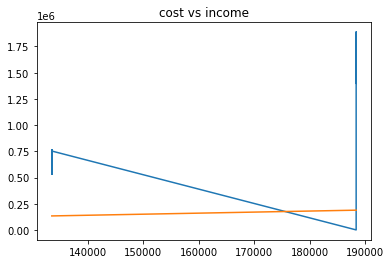

In [12]:
x = aero['cost']
y = aero['income']
y_1 = x
fig, ax = plt.subplots()
plt.title('cost vs income')
fig = plt.plot(x , y, x ,y_1) 
plt.show()